In [46]:
%load_ext autoreload
%autoreload 2

from caImageAnalysis import BrukerFish, VolumeFish
from caImageAnalysis.mesm import *
from caImageAnalysis.temporal import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Change the exp_folder to the path of the experiment

In [2]:
# Change this path to the experiment folder
exp_folder = r'/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818'

In [22]:
# Initialize the fish. 
# If custom 2P, use VolumeFish. If Bruker 2P, use BrukerFish.

# fish = VolumeFish(exp_folder)
fish = BrukerFish(exp_folder)
fish.data_paths

/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py:22: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 22 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  Bs_data = BeautifulSoup(xml)
/Users/minelarinel/mambaforge/envs/mescore/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that usi

Batch exists. Loading batch.pickle


/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py:22: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 22 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  Bs_data = BeautifulSoup(xml)
/Users/minelarinel/mambaforge/envs/mescore/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that usi

Batch exists. Loading batch.pickle


{'raw': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818/hindbrain-000'),
 'frametimes': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818/frametimes.txt'),
 'raw_image': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818/._ch2.tif'),
 'rotated': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818/raw_rotated.tif'),
 'opts': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818/opts.pkl'),
 'mesmerize': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818/mesmerize-batch'),
 'temporal': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818/temporal.h5'),
 'log': PosixPath('/Volumes/Rapid/bruker2P_data/elavl3H2BGCaMP8m_10dpf_fed_glucose_500mM_5_20230818/hindbrain-000/hindbrain-000.xml'),
 'voltage_output': Posi

## Detrend dF/F

In [8]:
# Compute the dF/F signal for each component
df = compute_dff(fish)
df

/Users/minelarinel/caImageAnalysis/caImageAnalysis/utils.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporal_df['dff'][i] = dffs
/Users/minelarinel/caImageAnalysis/caImageAnalysis/utils.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporal_df['dff'][i] = dffs
/Users/minelarinel/caImageAnalysis/caImageAnalysis/utils.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporal_df['dff'][i] = dffs
/Users/minelarinel/

plane                                           temporal  \
0      0  [[-4.453364870984601, -4.453364870984601, -4.4...   
1      1  [[-32.79498199117141, -32.79498199117141, -32....   
2      2  [[-6.8591717826398835, -6.8591717826398835, -6...   
3      3  [[-29.31373768454148, -29.31373768454148, -29....   
4      4  [[-6.364192053214542, -6.364192053214542, -6.3...   

                                         roi_indices pulse_frames  \
0  [3, 4, 5, 7, 9, 10, 11, 13, 14, 16, 17, 18, 19...   [388, 779]   
1  [1, 2, 3, 5, 6, 7, 8, 10, 11, 15, 16, 17, 19, ...   [387, 779]   
2  [3, 5, 8, 9, 10, 11, 14, 16, 17, 18, 19, 20, 2...   [387, 779]   
3  [0, 1, 2, 5, 7, 10, 11, 12, 15, 17, 18, 19, 20...   [387, 778]   
4  [1, 3, 4, 5, 7, 10, 12, 13, 15, 17, 18, 20, 21...   [387, 778]   

                                                 dff  
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
2  [[-0.2639954821903705, -0.2639954821903705, -0...  
3  [[-0.5123890479540817, -0.5123890479540817, -0...  
4  [[-0.04173954959157734, -0.04173954959157734, ...

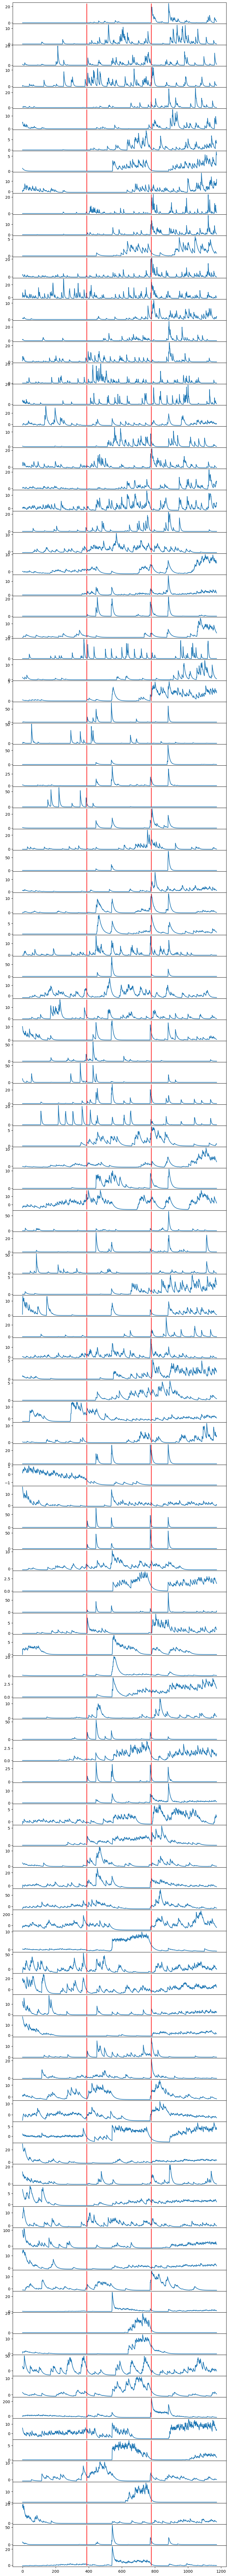

In [26]:
# Plot the individual dF/F traces per plane
plane = 0

plot_temporal(fish, plane, heatmap=False, key='dff')

/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py:22: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 22 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  Bs_data = BeautifulSoup(xml)
/Users/minelarinel/mambaforge/envs/mescore/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that usi

Batch exists. Loading batch.pickle


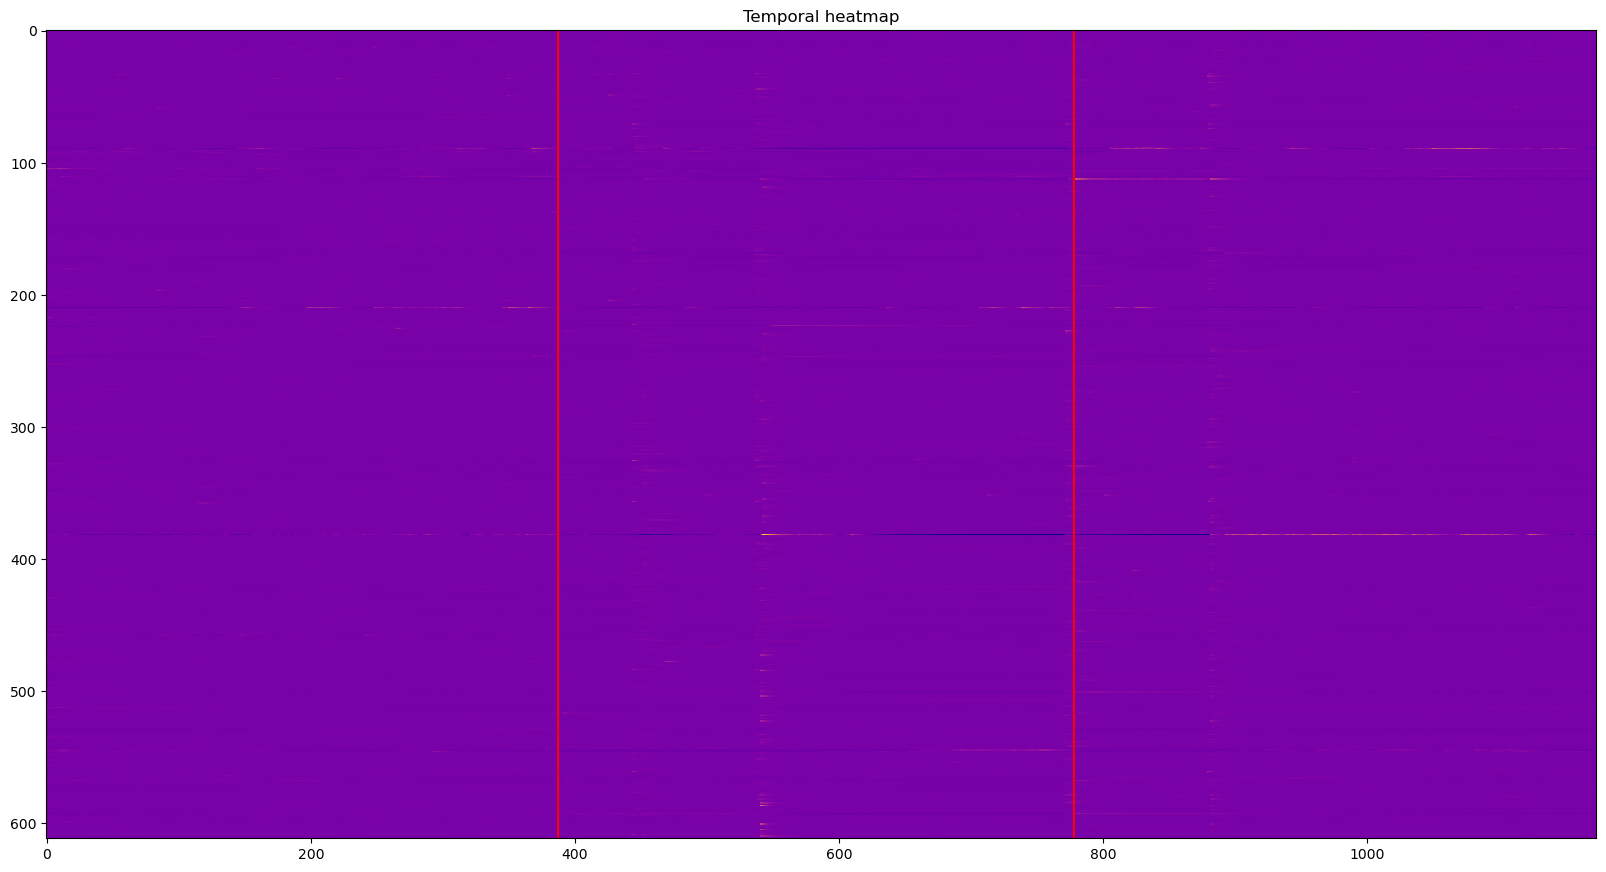

In [41]:
# Plot the individual dF/F traces of the entire volume as a heatmap
plot_temporal_volume(fish, key='dff')

### Normalize between 0 and 1

In [30]:
# Normalize each trace between 0 and 1
norm_df = normalize_dff(fish)
norm_df

/Users/minelarinel/caImageAnalysis/caImageAnalysis/temporal.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fish.temporal_df['norm_dff'][i] = norm_dffs
/Users/minelarinel/caImageAnalysis/caImageAnalysis/temporal.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fish.temporal_df['norm_dff'][i] = norm_dffs
/Users/minelarinel/caImageAnalysis/caImageAnalysis/temporal.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fish.tempora

plane                                           temporal  \
0      0  [[-4.453364870984601, -4.453364870984601, -4.4...   
1      1  [[-32.79498199117141, -32.79498199117141, -32....   
2      2  [[-6.8591717826398835, -6.8591717826398835, -6...   
3      3  [[-29.31373768454148, -29.31373768454148, -29....   
4      4  [[-6.364192053214542, -6.364192053214542, -6.3...   

                                         roi_indices pulse_frames  \
0  [3, 4, 5, 7, 9, 10, 11, 13, 14, 16, 17, 18, 19...   [388, 779]   
1  [1, 2, 3, 5, 6, 7, 8, 10, 11, 15, 16, 17, 19, ...   [387, 779]   
2  [3, 5, 8, 9, 10, 11, 14, 16, 17, 18, 19, 20, 2...   [387, 779]   
3  [0, 1, 2, 5, 7, 10, 11, 12, 15, 17, 18, 19, 20...   [387, 778]   
4  [1, 3, 4, 5, 7, 10, 12, 13, 15, 17, 18, 20, 21...   [387, 778]   

                                                 dff  \
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
2  [[-0.2639954821903705, -0.2639954821903705, -0...   
3  [[-0.5123890479540817, -0.5123890479540817, -0...   
4  [[-0.04173954959157734, -0.04173954959157734, ...   

                                            norm_dff  
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
1  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
2  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
3  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
4  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...

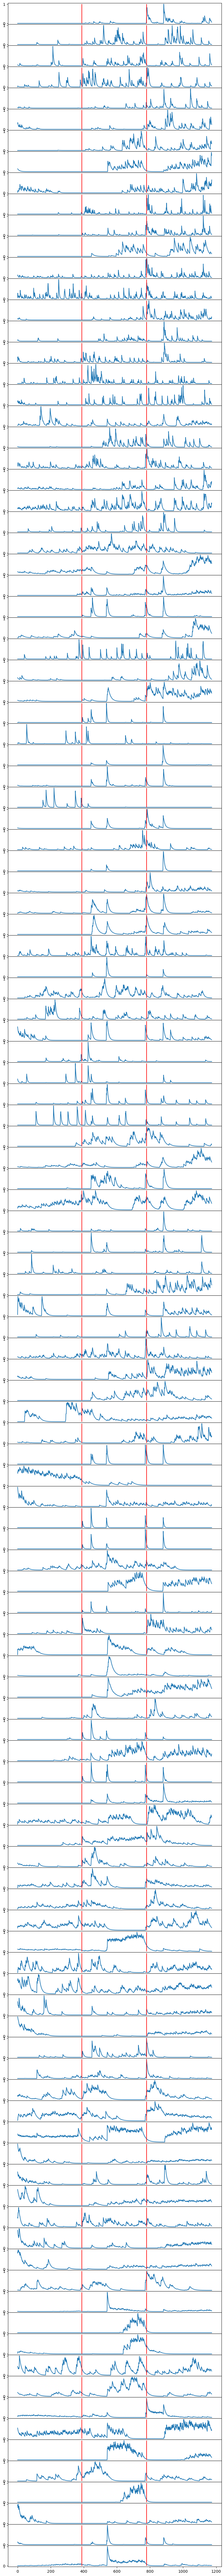

In [31]:
# Plot the individual normalized dF/F traces per plane
plane = 0

plot_temporal(fish, plane, heatmap=False, key='norm_dff')

/Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py:22: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 22 of the file /Users/minelarinel/caImageAnalysis/caImageAnalysis/bruker_2P/voltage_output.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  Bs_data = BeautifulSoup(xml)
/Users/minelarinel/mambaforge/envs/mescore/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that usi

Batch exists. Loading batch.pickle


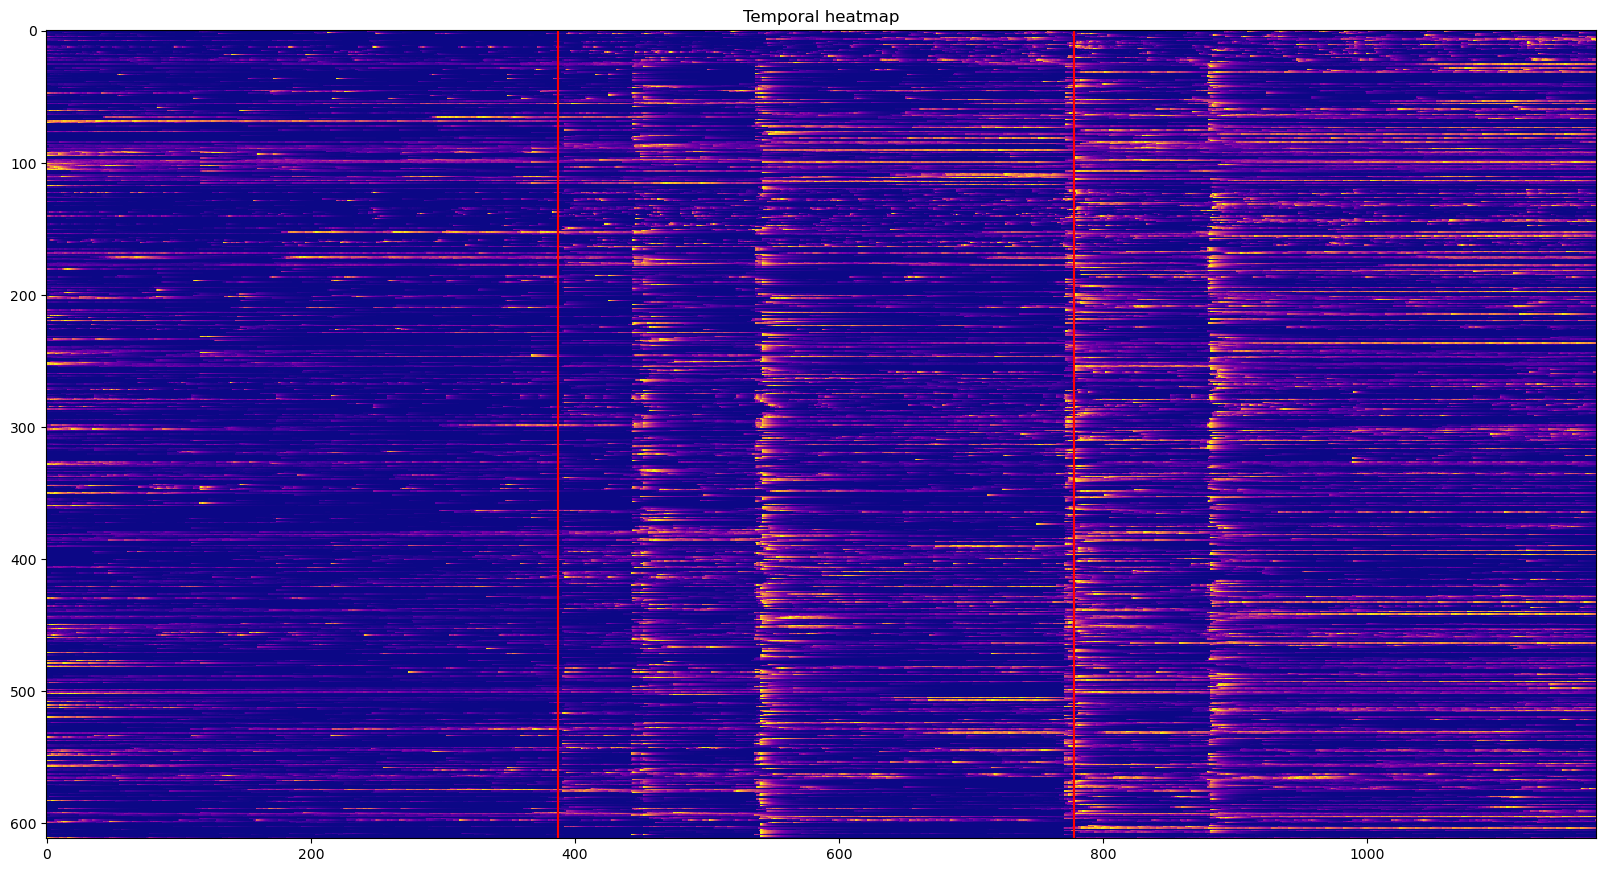

In [42]:
# Plot the individual normalized dF/F traces of the entire volume as a heatmap
plot_temporal_volume(fish, key='norm_dff')

## Cluster temporal responses

In [44]:
fish.vol_temporal.shape  # (# of components, frames)

(612, 1174)

Number of clusters: 18


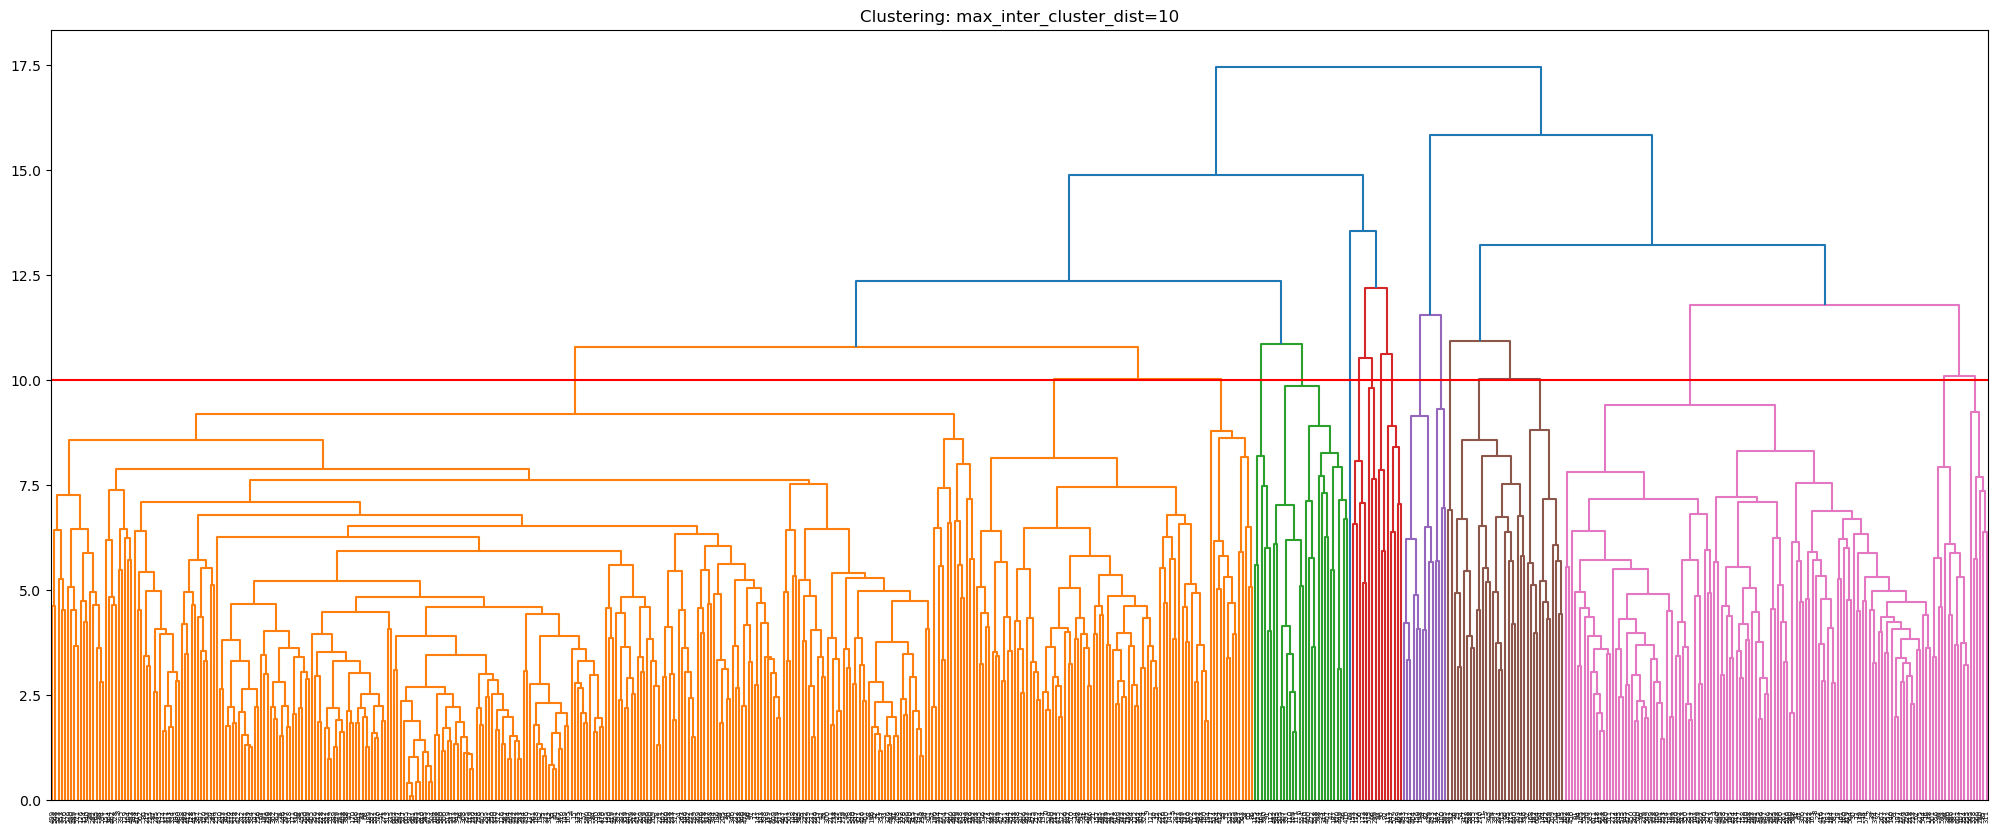

In [59]:
# Cluster the temporal responses
max_inter_cluster_dist = 10  # Set the threshold for maximum inter-cluster distance allowed

sorted_inds, sorted_clusters, sorted_ind_clusters = cluster_temporal(fish, max_inter_cluster_dist=max_inter_cluster_dist, sort=True)

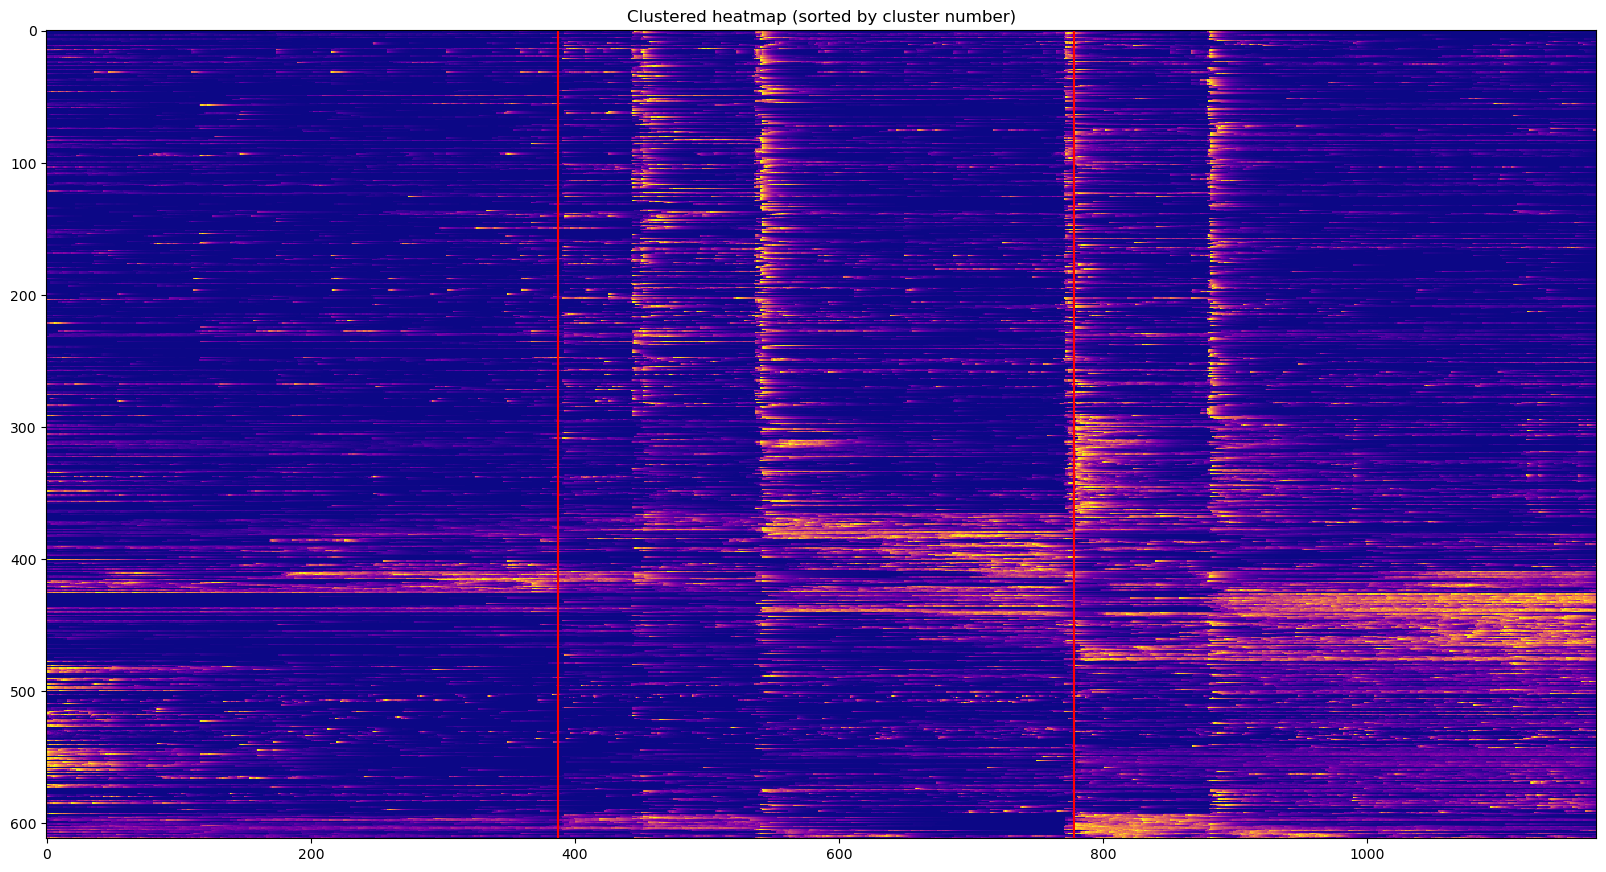

In [61]:
# Heatmap sorted by cluster number
data = fish.vol_temporal[sorted_inds]
title = 'Clustered heatmap (sorted by cluster number)'
plot_temporal_volume(fish, data=data, title=title)

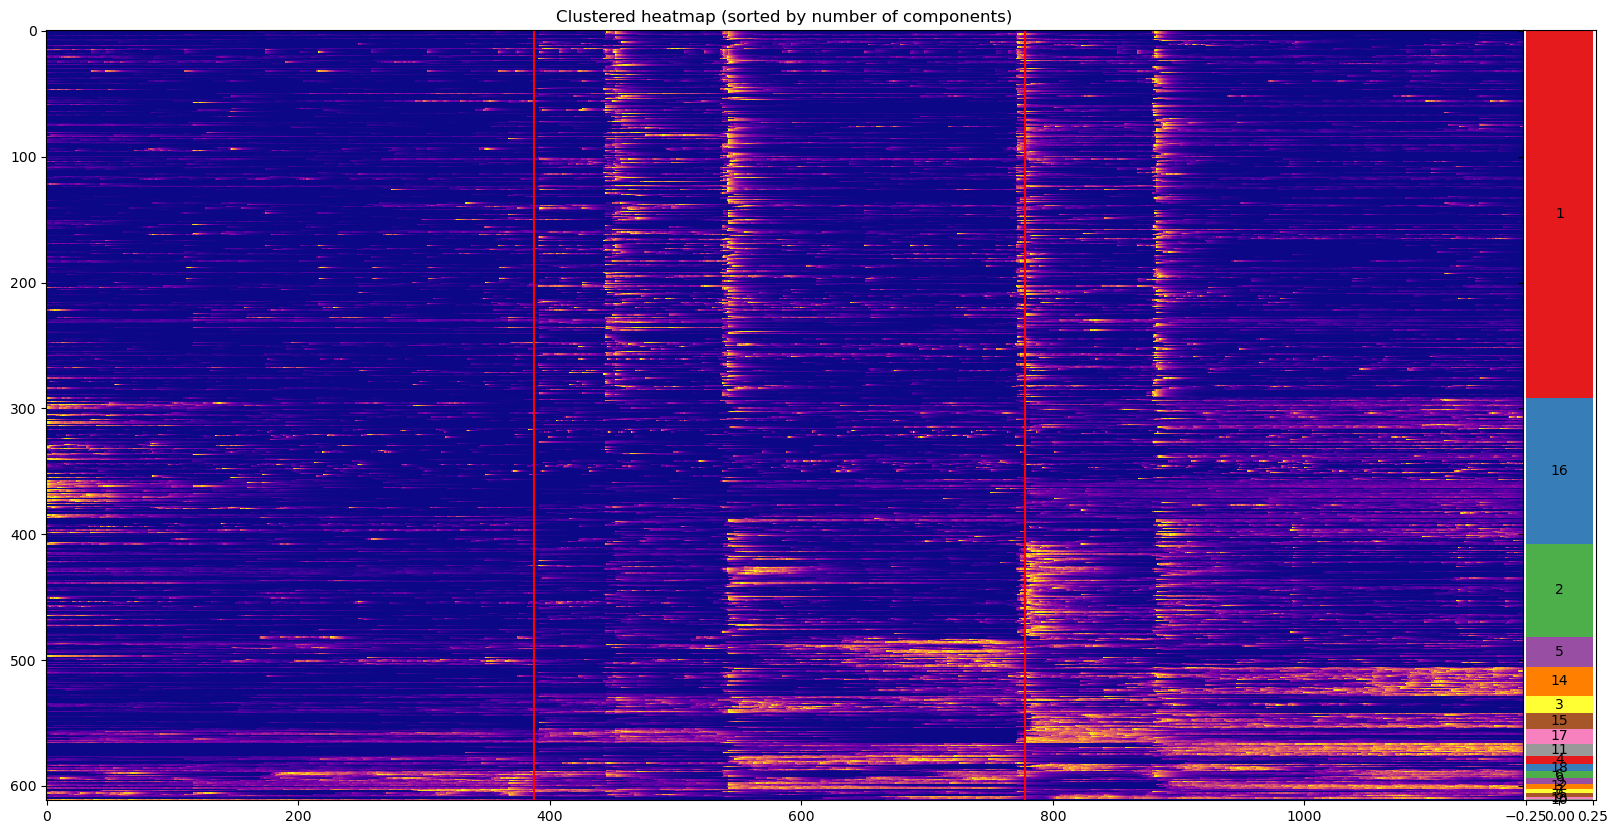

In [68]:
# Heatmap sorted by the number of components in cluster
data = sum(sorted_clusters.values(), [])
title = 'Clustered heatmap (sorted by number of components)'
plot_temporal_volume(fish, data=data, title=title, clusters=sorted_clusters)

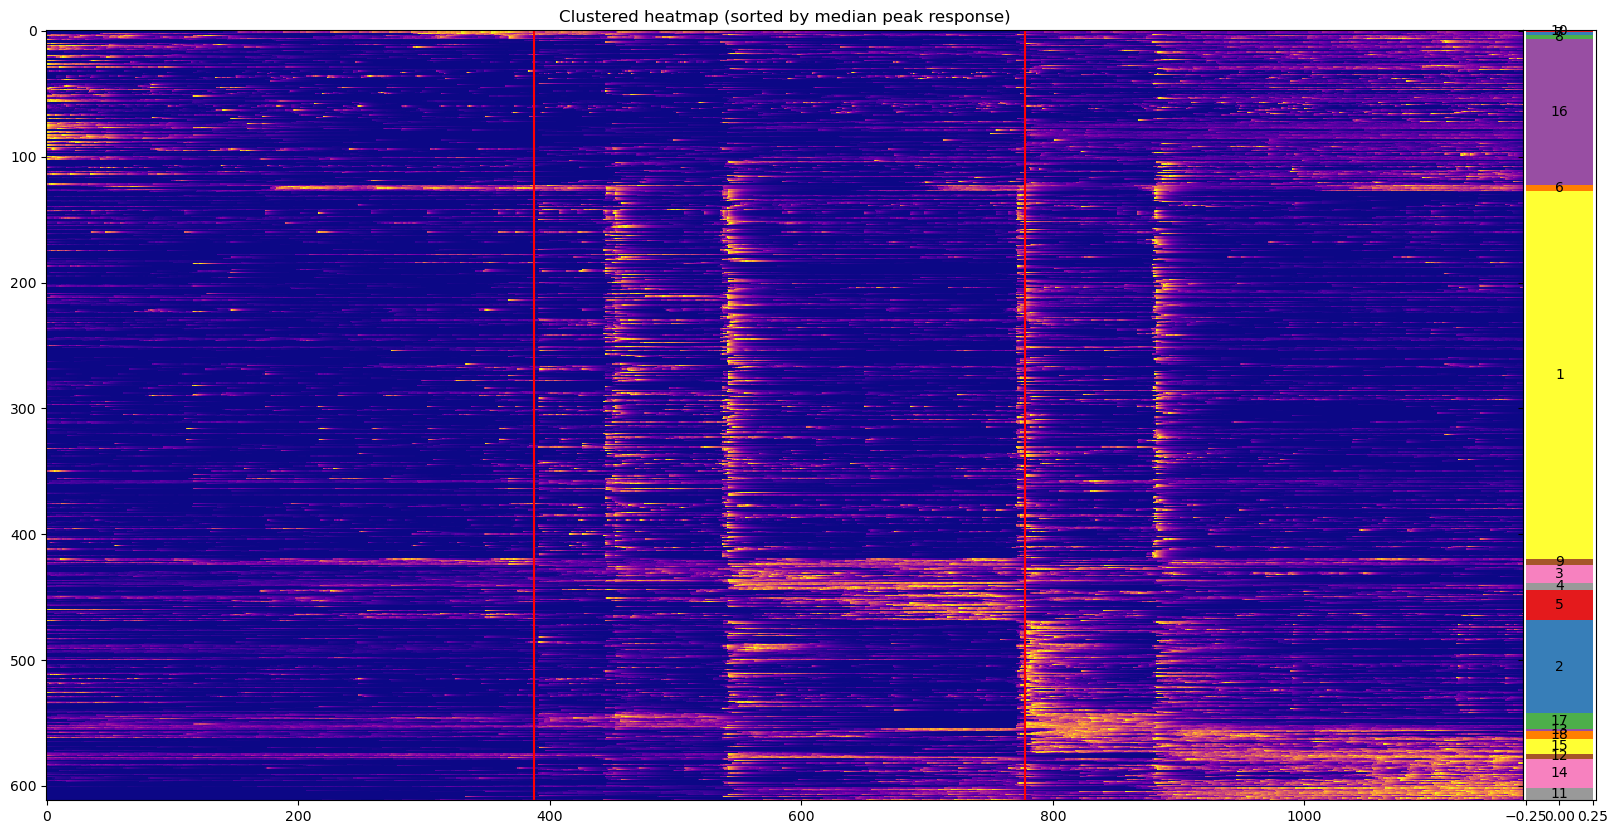

In [70]:
data = sum(sorted_ind_clusters.values(), [])
title = 'Clustered heatmap (sorted by median peak response)'
plot_temporal_volume(fish, data=data, title=title, clusters=sorted_ind_clusters, savefig=True)

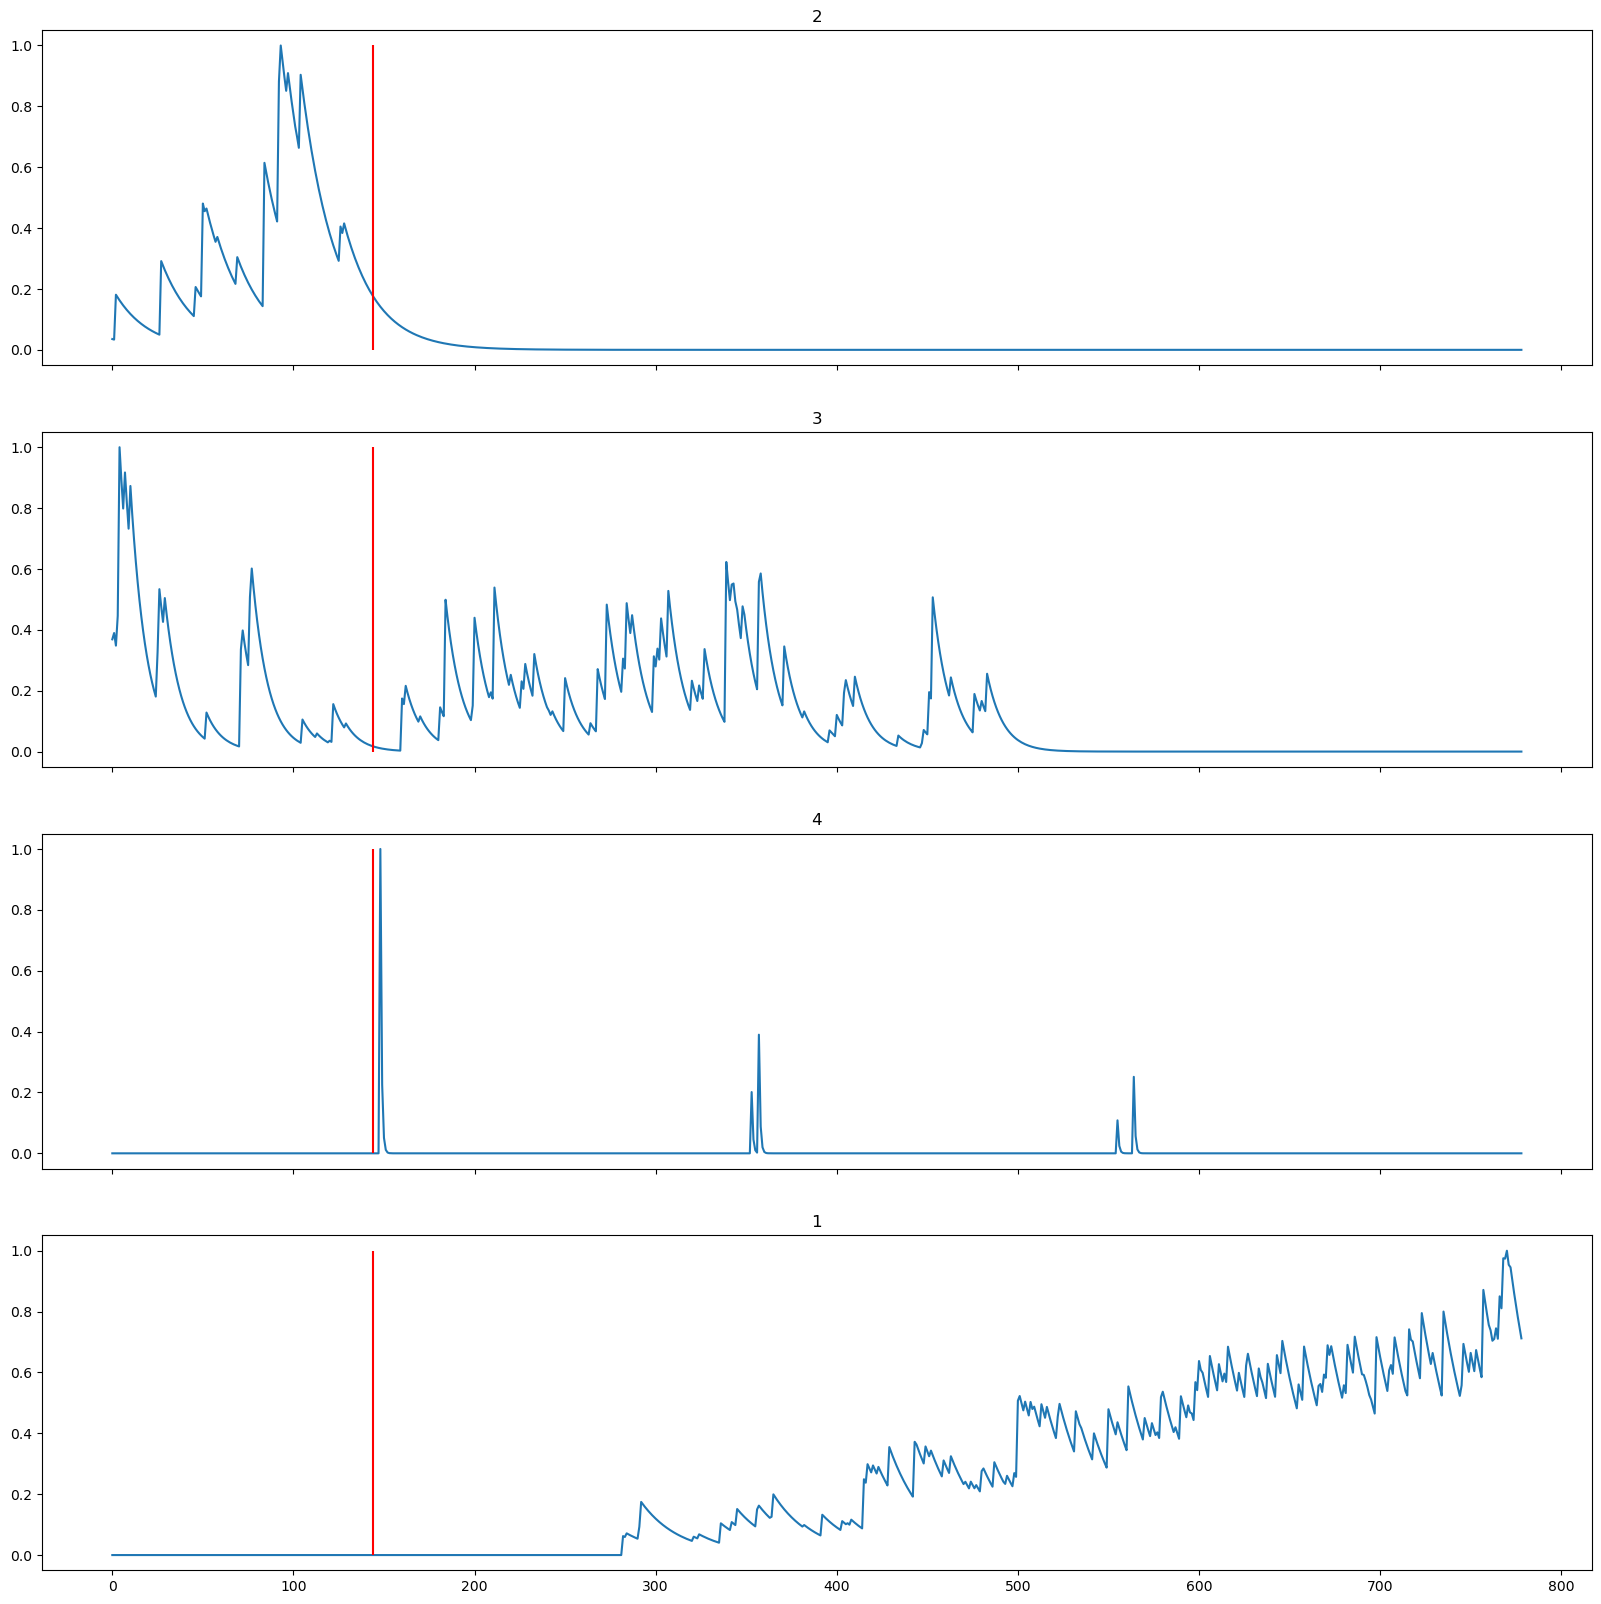

In [403]:
# Representative traces from each cluster

import random

fig, axes = plt.subplots(len(sorted_clusters), 1, sharex=True, sharey=True, figsize=(20, 20))

for i, (cluster, temp) in enumerate(sorted_clusters.items()):
    t = random.choice(temp)
    axes[i].plot(t)
    axes[i].title.set_text(cluster)
    axes[i].vlines(min(norm_df.inj_frame), 0, 1, color='r')
    
plt.savefig(fish.data_paths['postgavage_path'].joinpath("cluster_representative_traces.pdf"), transparent=True)

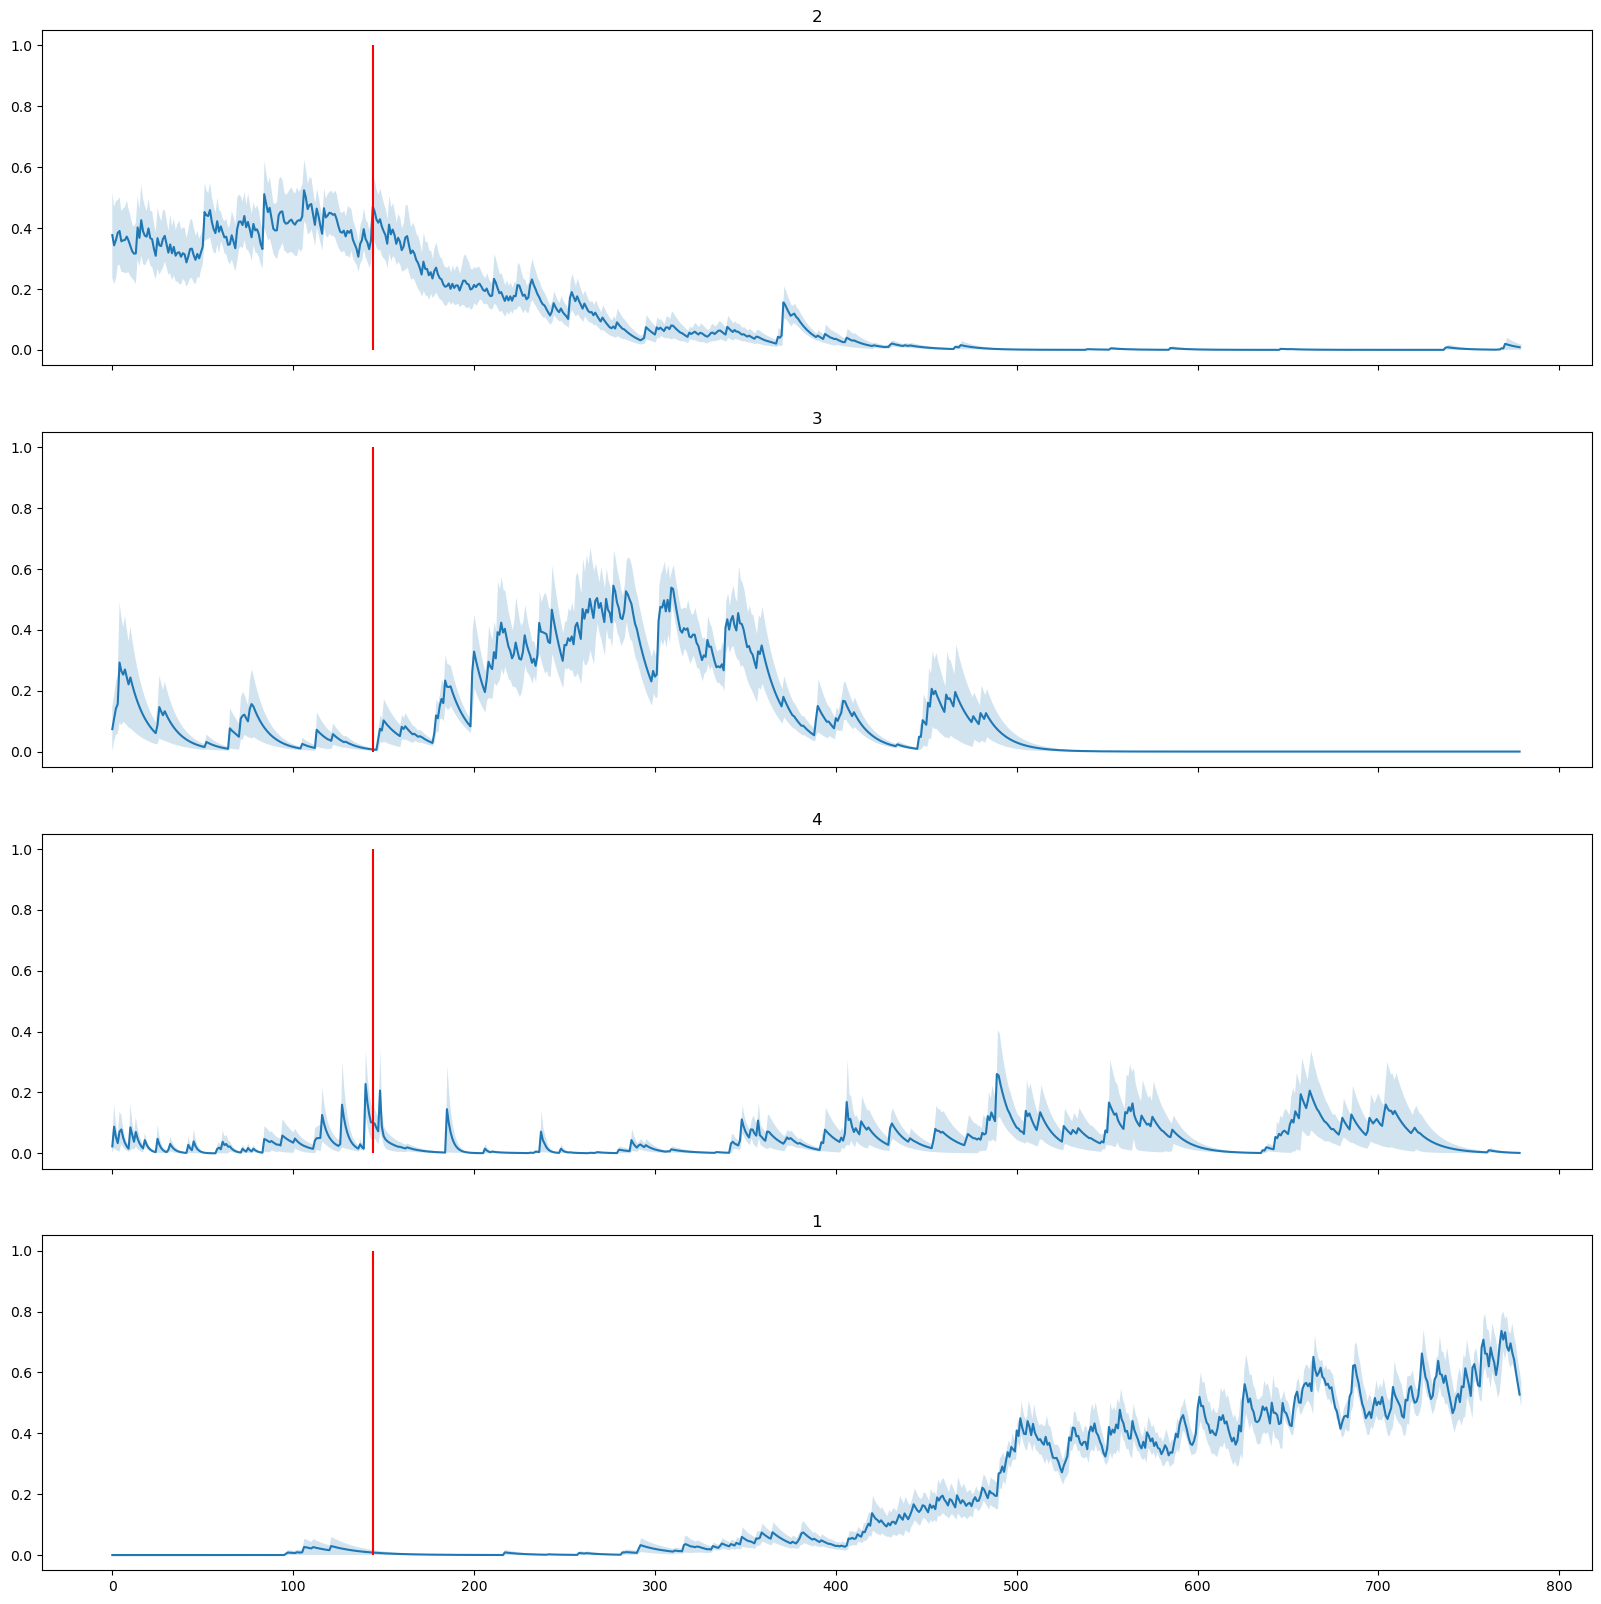

In [404]:
# Average traces for each cluster

from scipy.stats import sem

fig, axes = plt.subplots(len(sorted_clusters), 1, sharex=True, sharey=True, figsize=(20, 20))

for i, (cluster, temp) in enumerate(sorted_clusters.items()):
    t = np.mean(temp, axis=0)
    err = sem(temp)
    x = np.linspace(0, len(t), len(t))
    axes[i].plot(t)
    axes[i].fill_between(x, t-err, t+err, alpha=0.2)
    axes[i].title.set_text(cluster)
    axes[i].vlines(min(norm_df.inj_frame), 0, 1, color='r')

plt.savefig(fish.data_paths['postgavage_path'].joinpath("cluster_average_traces.pdf"), transparent=True)

In [405]:
# Visualize all the planes for spatial representation

mes_df = uuid_to_plane(load_mesmerize(fish))
iw = visualize_mesmerize(mes_df, 'mcorr')
iw.show()

Batch exists. Loading batch.pickle
Decode mmap filename C:\Users\minel\Documents\data\elavl3H2BGCaMP8m_8dpf_fed_glucose_625mM_54_20230405\postgavage_vagal_R\mesmerize-batch\12991aac-b23d-47d5-bcc1-19f4fb9ef26d\12991aac-b23d-47d5-bcc1-19f4fb9ef26d-image_els__d1_400_d2_400_d3_1_order_F_frames_780.mmap
Decode mmap filename C:\Users\minel\Documents\data\elavl3H2BGCaMP8m_8dpf_fed_glucose_625mM_54_20230405\postgavage_vagal_R\mesmerize-batch\28797fdd-3ef5-4682-84b2-138ee9252385\28797fdd-3ef5-4682-84b2-138ee9252385-image_els__d1_400_d2_400_d3_1_order_F_frames_780.mmap
Decode mmap filename C:\Users\minel\Documents\data\elavl3H2BGCaMP8m_8dpf_fed_glucose_625mM_54_20230405\postgavage_vagal_R\mesmerize-batch\7861b5b1-0c09-47f8-beb6-678af2d43acc\7861b5b1-0c09-47f8-beb6-678af2d43acc-image_els__d1_400_d2_400_d3_1_order_F_frames_780.mmap
Decode mmap filename C:\Users\minel\Documents\data\elavl3H2BGCaMP8m_8dpf_fed_glucose_625mM_54_20230405\postgavage_vagal_R\mesmerize-batch\b14d1f71-c211-4158-a1cf-85946

RFBOutputContext()

In [406]:
iw.plot.canvas.close()

In [407]:
# Organize centers of mass into clusters for spatial representation

all_coms = []

for i, row in norm_df.iterrows():
    plane = f'img_stack_{row.plane}'
    mes_row = mes_df[(mes_df.algo == 'cnmf') & (mes_df.item_name == plane)].iloc[0]
    _, coms = mes_row.cnmf.get_contours('good', swap_dim=False)  
    coms = np.array(coms)
    coms = coms[row.roi_indices]
    all_coms.append(coms)
     
all_coms = np.concatenate(all_coms)

com_clusters = {}

for i, cluster in enumerate(T[sort]):
    if cluster in com_clusters:
        com_clusters[cluster].append(all_coms[sort][i])
    else:
        com_clusters[cluster] = [all_coms[sort][i]]

sorted_com_clusters = {key: com_clusters[key] for key in sorted_keys}
sorted_com_clusters

{2: [array([179.65743343, 198.56342606]),
  array([ 72.48936734, 181.05101105]),
  array([ 63.15910984, 190.44478909]),
  array([ 78.63704318, 190.06810329]),
  array([ 40.39892444, 212.95614033]),
  array([ 65.41648944, 178.54150448]),
  array([ 48.00504629, 168.0662907 ]),
  array([ 69.36466444, 136.88772944]),
  array([ 58.36118851, 241.83802043])],
 3: [array([194.3122381 , 220.42803567]),
  array([113.3782156 , 193.75012255]),
  array([115.66968775, 199.8099511 ]),
  array([ 85.83189723, 230.73046928]),
  array([ 83.99423279, 235.01687633])],
 4: [array([126.74400241, 140.6588847 ]),
  array([ 85.92833787, 242.58393466]),
  array([ 38.19795127, 240.47437742]),
  array([ 87.2741809 , 219.12027666]),
  array([ 46.79652041, 227.05130394]),
  array([ 41.43097087, 173.84394682]),
  array([207.12588411, 204.42435414])],
 1: [array([ 52.9036898 , 219.52728974]),
  array([ 74.61345737, 243.58204747]),
  array([ 54.26869947, 194.69840541]),
  array([130.58414783, 192.00667643]),
  array([ 

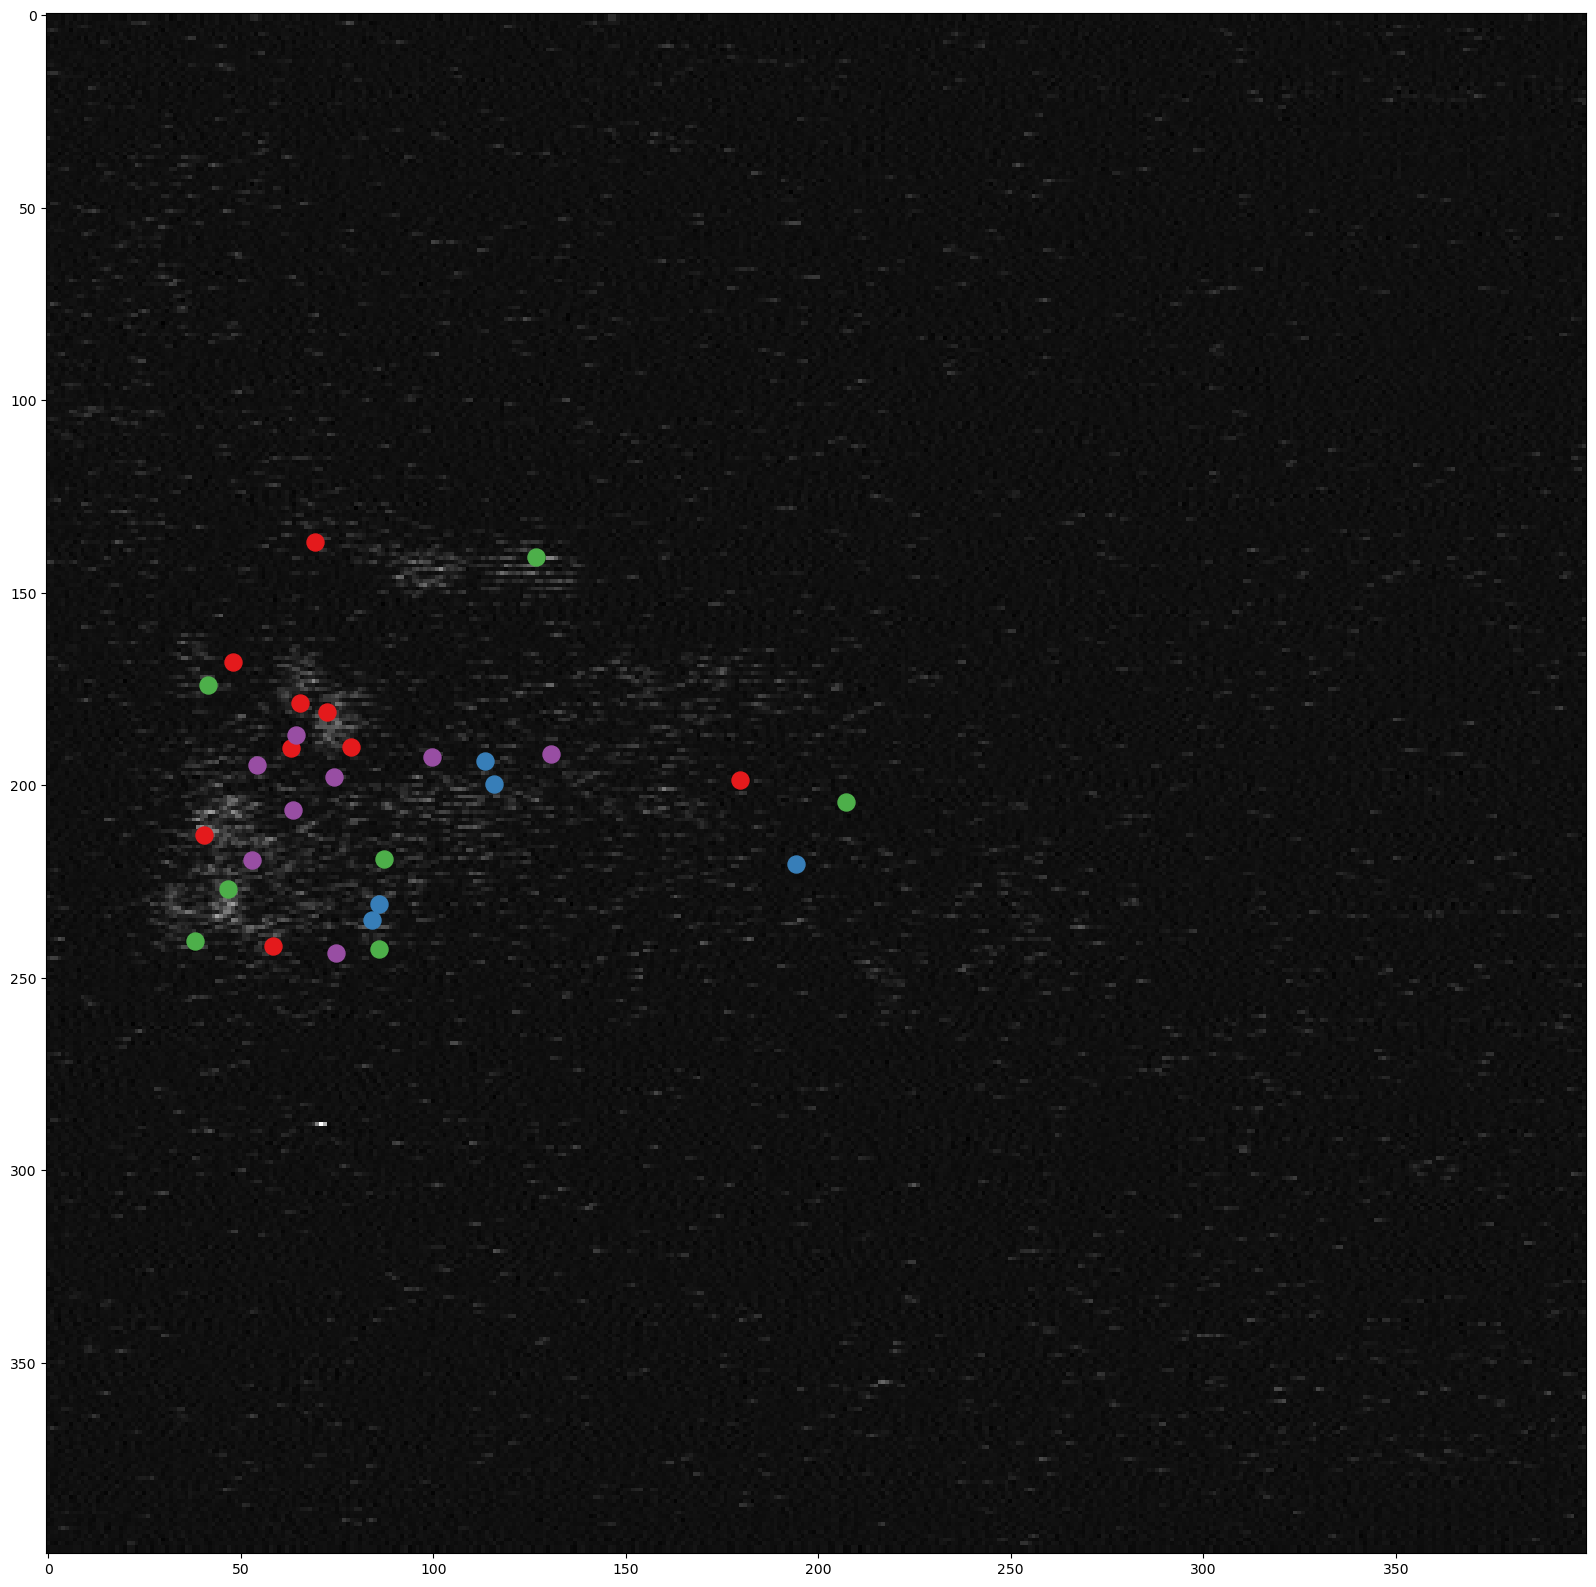

In [411]:
# Pick a plane and plot coms of all clusters

index = 1

img = mes_df.iloc[index].caiman.get_input_movie()[0]
# img = imread(os.path.join(fish.data_paths['anatomy'], 'downsampled_sum.tif'))

fig = plt.figure(figsize=(20, 20))
plt.imshow(img, cmap='gray')

cmap = get_cmap('Set1')  # type: matplotlib.colors.ListedColormap
cmap2 = get_cmap('Accent')  # type: matplotlib.colors.ListedColormap
colors = cmap.colors + cmap2.colors  # type: list

for i, (cluster, coms) in enumerate(sorted_com_clusters.items()):
    for com in coms:
        plt.scatter(com[0], com[1], s=150, color=colors[i])
        
plt.savefig(fish.data_paths['postgavage_path'].joinpath("clusters_spatial_all.pdf"), transparent=True)

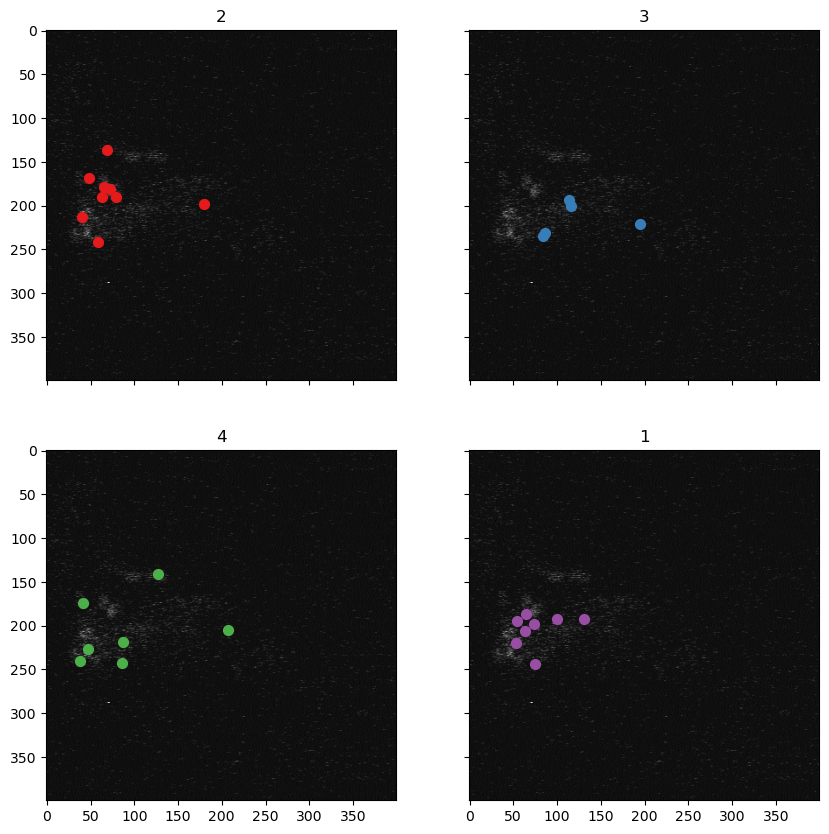

In [412]:
# Plot individual clusters

n_cols = 2
fig, axes = plt.subplots(ceil(len(sorted_com_clusters)/n_cols), n_cols, sharex=True, sharey=True, figsize=(10, ceil(len(sorted_com_clusters)/n_cols)*5))

cmap = get_cmap('Set1')  # type: matplotlib.colors.ListedColormap
cmap2 = get_cmap('Accent')  # type: matplotlib.colors.ListedColormap
colors = cmap.colors + cmap2.colors  # type: list

for i, (cluster, coms) in enumerate(sorted_com_clusters.items()):
    axes[int(i / n_cols), int(i % n_cols)].imshow(img, cmap='gray')
    axes[int(i / n_cols), int(i % n_cols)].title.set_text(cluster)
    for com in coms:
        axes[int(i / n_cols), int(i % n_cols)].scatter(com[0], com[1], s=50, color=colors[i])
        
plt.show()

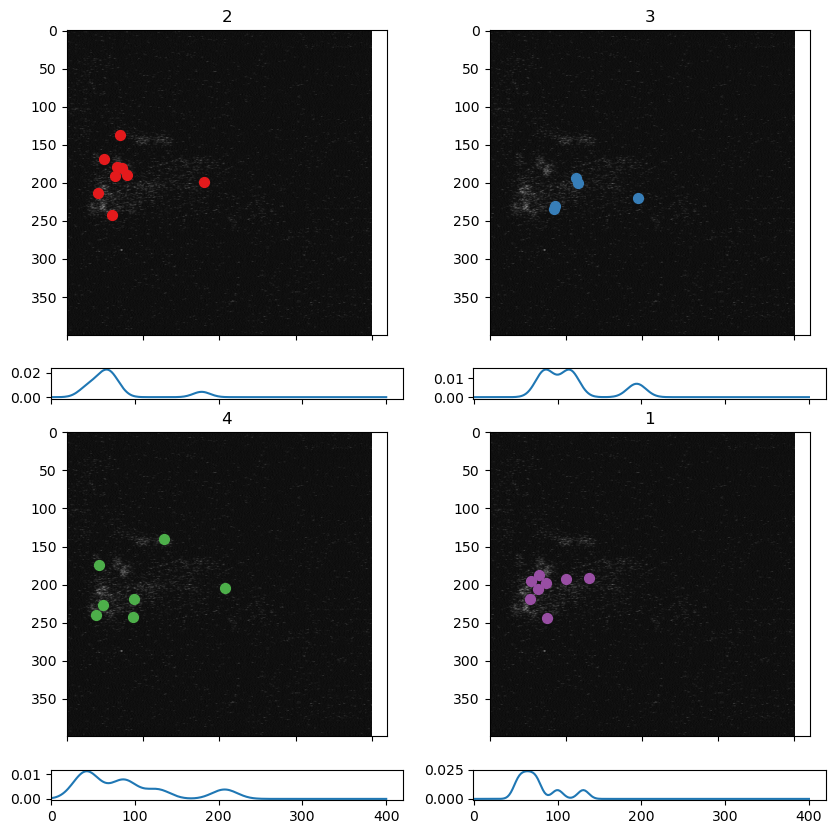

In [413]:
# Plot the x-distribution (lateralization) of neurons
from scipy.stats import gaussian_kde

n_cols = 2
n_rows = ceil(len(sorted_com_clusters)/n_cols)*2
fig, axes = plt.subplots(n_rows, n_cols, sharex=True, figsize=(10, ceil(len(sorted_com_clusters)/n_cols)*5), 
                        height_ratios=[10, 1] * int(n_rows/2))

cmap = get_cmap('Set1')  # type: matplotlib.colors.ListedColormap
cmap2 = get_cmap('Accent')  # type: matplotlib.colors.ListedColormap
colors = cmap.colors + cmap2.colors  # type: list

for i, (cluster, coms) in enumerate(sorted_com_clusters.items()):
    if i % 2 == 0:
        img_row = i
        dist_row = i + 1
    else:
        img_row = i - 1
        dist_row = i
    
    axes[img_row, int(i % n_cols)].imshow(img, cmap='gray')
    axes[img_row, int(i % n_cols)].title.set_text(cluster)
    
    coords = []
    
    for com in coms:
        axes[img_row, int(i % n_cols)].scatter(com[0], com[1], s=50, color=colors[i])
        coords.append(com[0])
    
    if len(coords) > 1:
        density = gaussian_kde(coords)
        density.covariance_factor = lambda : .25
        density._compute_covariance()

        xs = np.linspace(0, img.shape[1], 200)

        axes[dist_row, int(i % n_cols)].plot(xs, density(xs))

plt.subplots_adjust(hspace=0.2)
plt.savefig(fish.data_paths['postgavage_path'].joinpath("clusters_spatial_individual.pdf"), transparent=True)

In [165]:
with os.scandir(fish.data_paths['anatomy']) as entries:
    for entry in entries:
        if entry.name.endswith('.tif') and entry.name.startswith('postgavage'):
            img_path = entry.path

In [171]:
from tifffile import imread
img = imread(img_path)
sum_img = np.fliplr(np.sum(img, axis=0))

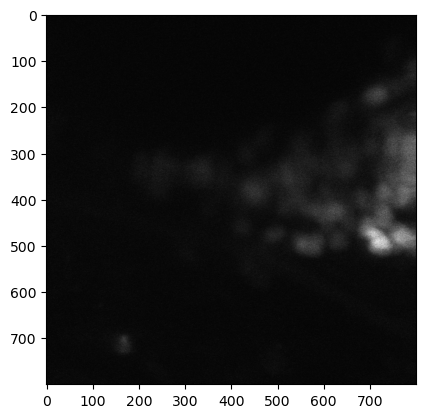

In [173]:
plt.imshow(sum_img, cmap='gray')

In [179]:
from skimage.measure import block_reduce
ds_img = block_reduce(sum_img, block_size=(3, 3), func=np.mean)

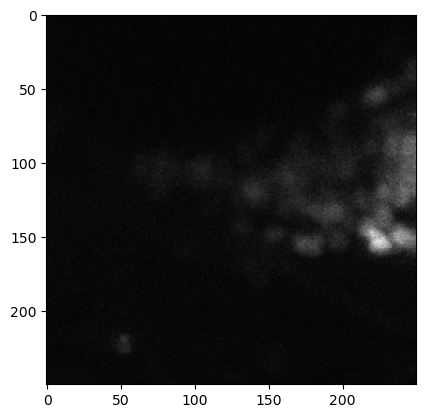

In [186]:
plt.imshow(a, cmap='gray')

In [181]:
from scipy import ndimage

def block_mean(ar, fact):
    assert isinstance(fact, int), type(fact)
    sx, sy = ar.shape
    X, Y = np.ogrid[0:sx, 0:sy]
    regions = sy//fact * (X//fact) + Y//fact
    res = ndimage.mean(ar, labels=regions, index=np.arange(regions.max() + 1))
    res.shape = (sx//fact, sy//fact)
    return res

In [182]:
block_mean(sum_img, 3.2).shape

AssertionError: <class 'float'>

In [185]:
a = ndimage.interpolation.zoom(sum_img,0.3125) #decimate resolution

C:\Users\minel\AppData\Local\Temp\ipykernel_7288\3668896975.py:1: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  a = ndimage.interpolation.zoom(sum_img,0.3125) #decimate resolution


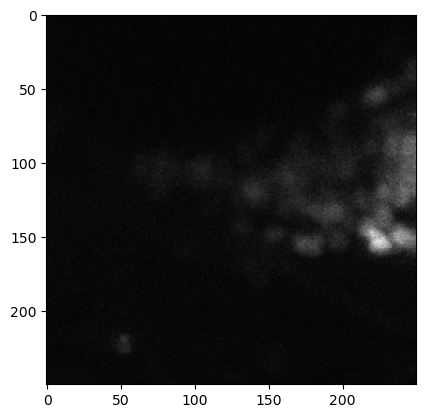

In [187]:
plt.imshow(a, cmap='gray')

In [188]:
from tifffile import imwrite

In [190]:
imwrite(os.path.join(fish.data_paths['anatomy'], 'downsampled_sum.tif'), a)